<a href="https://colab.research.google.com/github/rohailkhan/Machine_learning_Python/blob/master/Sonar_Data_Classification_Rocks_vs_Mines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
seed=7

In [2]:
path='https://raw.githubusercontent.com/rohailkhan/data/main/sonar.csv'
sonar=pd.read_csv(path,header=None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## EDA

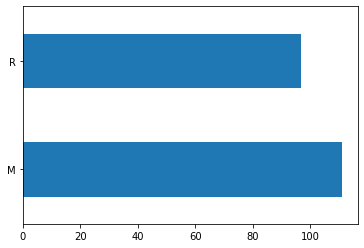

In [3]:
sonar[60].value_counts().plot(kind='barh')
plt.show()

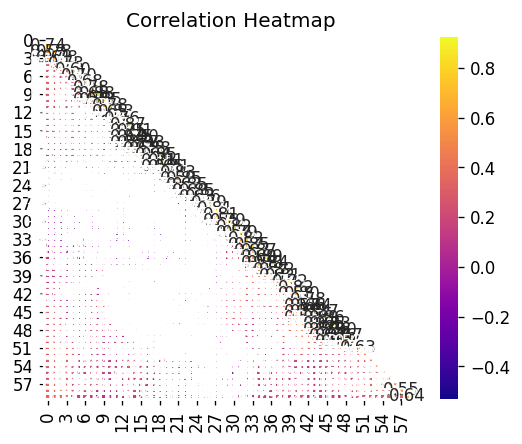

In [6]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(sonar.corr())
sns.heatmap(sonar.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

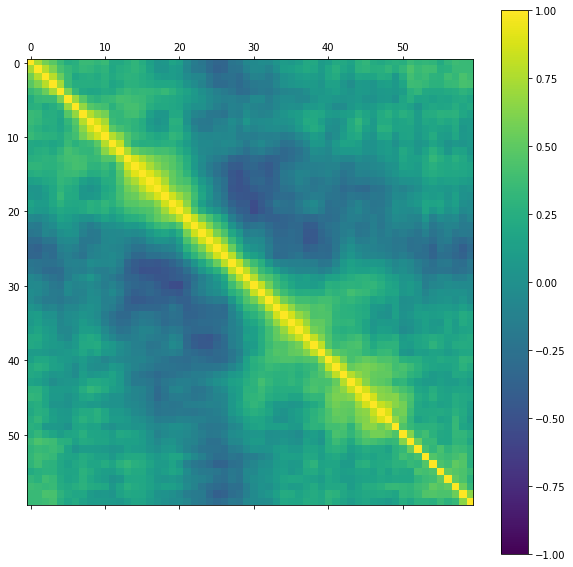

In [ ]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sonar.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
pyplot.show()

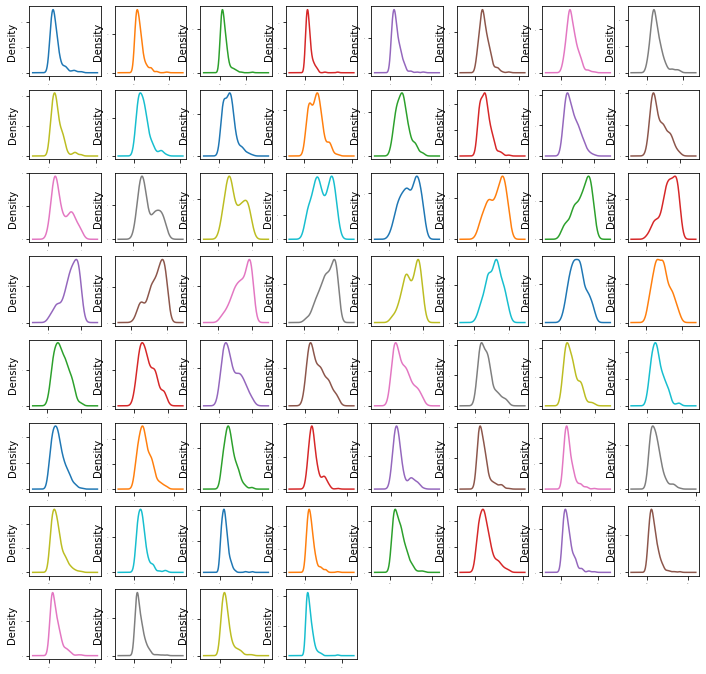

In [ ]:
# density
sonar.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

## **Start Machine Learning**

## Split Target and Features

In [ ]:
X=sonar.iloc[:,0:60].values.astype('float')
Y=sonar.iloc[:,-1].values

In [ ]:
# one hot encoding for the target is not needed as we are not using deep learning model

# **My Plan** 
### Step-1 Evaluate 6 ML Algoriths with K-fold cross validation and choose the best one

### Step-2 Further tune the ML models selected from  
Note: 
1- In case of SVM ,we use  Standardization and tune hyperparameters using Grid-search with K-fold cross validation.

2-The penalty parameter **C** and **kernel types** (sigmoid,poly,linear,rbf)  needs to be tuned in grid search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step-1 Evaluate 6 ML Algorithms 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
pipelines = []


ScaledLR=('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())]))
ScaledLDA=('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())]))
ScaledKNN=('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]))
ScaledCART=('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())]))
ScaledNB=('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())]))
ScaledSVC=('ScaledSVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC())]))

full_ml_list=ScaledLR,ScaledLDA,ScaledKNN,ScaledCART , ScaledNB ,ScaledSVC



In [ ]:
for m in full_ml_list:
  print(len(m))

2
2
2
2
2
2


In [ ]:
for ml in full_ml_list:
  pipelines.append(ml)

In [ ]:
len(pipelines)

6

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
results = []
names = []
for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.783333 (0.073648)
ScaledLDA: 0.754286 (0.083766)
ScaledKNN: 0.811905 (0.077232)
ScaledCART: 0.687381 (0.101217)
ScaledNB: 0.676905 (0.119267)
ScaledSVC: 0.825952 (0.095110)


In [ ]:
names

['ScaledLR', 'ScaledLDA', 'ScaledKNN', 'ScaledCART', 'ScaledNB', 'ScaledSVC']

In [ ]:
import seaborn as sns

### Plotting Model performance

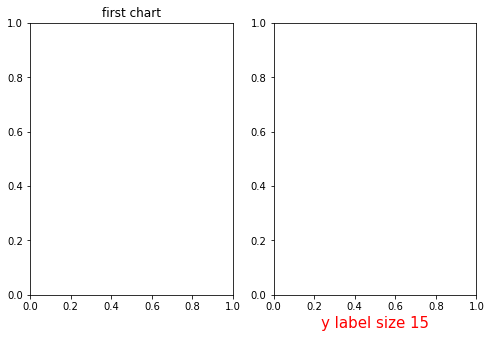

In [ ]:
fig, axes = plt.subplots( 1,2, figsize=(8,5)) # matplot part for defining figure and no of axes(plots)

axes[0].set_title('first chart')
axes[1].set_xlabel('y label size 15',color='r',size=15)
plt.show()

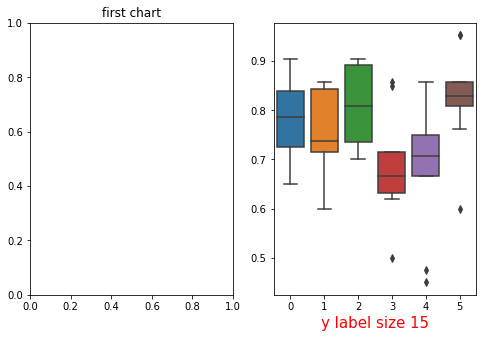

In [ ]:
fig, axes = plt.subplots( 1,2, figsize=(8,5)) # matplot part for defining figure and no of axes(plots)
sns.boxplot(data=results)  # seaborn boxplot
axes[0].set_title('first chart')
axes[1].set_xlabel('y label size 15',color='r',size=15)
plt.show()

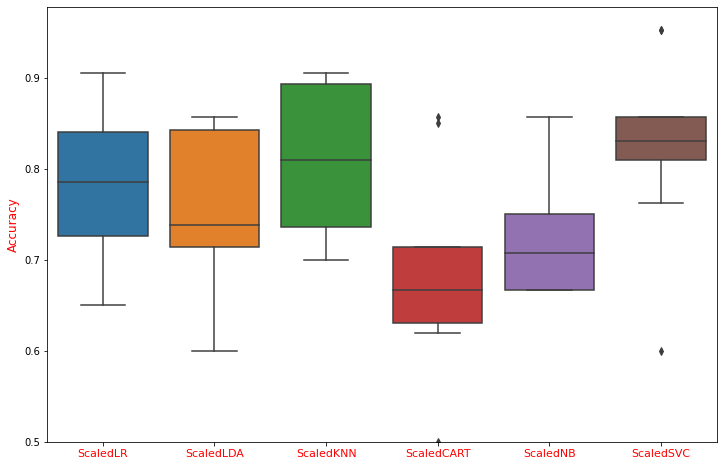

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=results)
ax.set_ylabel('Accuracy', color='r',size=12)
ax.set_ylim(ymin=0.5)
plt.xticks([0,1,2,3,4,5],names, color='r',size=11)
plt.show()

### Result of Step-1 
#### KNN and SVC algorithms shows the highest accuracy

# **Step-2   Fine Tuning the best ML models (KNN & SVM)**

## **KNN Model tuning**
It has one paramter that needs to be tunes i.e number of neighbors. This will be tuned using combination of grid search and kfold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score , KFold ,GridSearchCV

In [ ]:
standard_scalor_fitting=StandardScaler().fit(X)
rescaled_X=standard_scalor_fitting.transform(X)
seed=7
k_neighbours=[1,3,5,7,9,11,13,14,15]

param_dictionary = dict(n_neighbors=k_neighbours)  
# param dictionary for grid search

kfold=KFold(n_splits=10,shuffle=True,random_state=seed) # K fold cross validation object

grid=GridSearchCV(estimator=KNeighborsClassifier() ,param_grid=param_dictionary,cv=kfold)

grid_search_result_knn=grid.fit(rescaled_X,Y)

In [ ]:
print("Best: %f using %s" % (grid_search_result_knn.best_score_, grid_search_result_knn.best_params_))

Best: 0.870476 using {'n_neighbors': 1}


In [ ]:
# we only need the above best model and best param results...but just for display..other models can also be displayed as

grid_search_result_knn.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
means = grid_search_result_knn.cv_results_['mean_test_score']
stds = grid_search_result_knn.cv_results_['std_test_score']
params = grid_search_result_knn.cv_results_['params']
ranks = grid_search_result_knn.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

#1 0.870476 (0.042701) with: {'n_neighbors': 1}
#2 0.865000 (0.061353) with: {'n_neighbors': 3}
#3 0.822619 (0.067320) with: {'n_neighbors': 5}
#4 0.798095 (0.060841) with: {'n_neighbors': 7}
#5 0.792857 (0.086169) with: {'n_neighbors': 9}
#6 0.749762 (0.085929) with: {'n_neighbors': 11}
#7 0.735000 (0.093411) with: {'n_neighbors': 13}
#9 0.711190 (0.092005) with: {'n_neighbors': 14}
#8 0.715952 (0.085662) with: {'n_neighbors': 15}


In [ ]:
grid_search_result_knn.cv_results_['rank_test_score']

array([1, 2, 3, 4, 5, 6, 7, 9, 8], dtype=int32)

## **SVM Model tuning**

Parameters of SVM are C and kernel. 

In [ ]:
standard_scalor_fitting=StandardScaler().fit(X)
rescaled_X=standard_scalor_fitting.transform(X)
seed=7

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_dictionary =dict(C=c_values, kernel=kernel_values)  
# param dictionary for grid search

kfold=KFold(n_splits=10,shuffle=True,random_state=seed) # K fold cross validation object

grid=GridSearchCV(estimator=SVC() ,param_grid=param_dictionary,cv=kfold)

grid_search_result_SVM=grid.fit(rescaled_X,Y)

In [ ]:
print("Best: %f using %s" % (grid_search_result_SVM.best_score_, grid_search_result_SVM.best_params_))

Best: 0.869762 using {'C': 2.0, 'kernel': 'rbf'}


## **Winner is KNN due to higher accuracy of 0.870476 using {'n_neighbors': 1}**

# Final Step : Using ensemle
## Note : There is no need to use standard scaling in ensemble

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# ensembles
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [ ]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True) 
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.821667 (0.075836)
GBM: 0.855000 (0.105099)
RF: 0.830714 (0.130699)
ET: 0.869286 (0.091699)


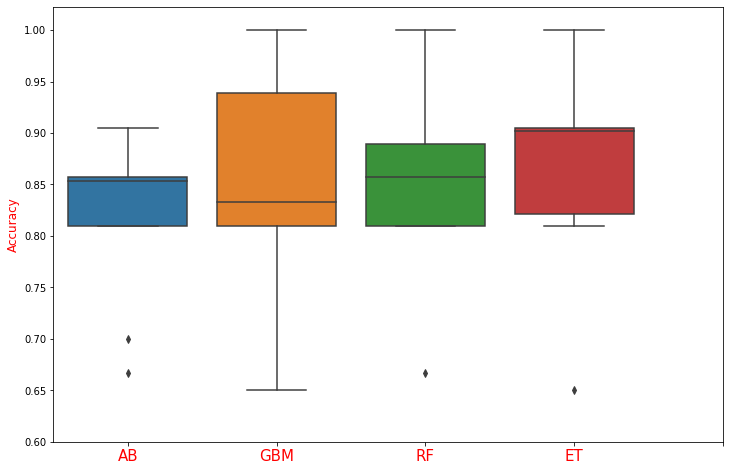

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=results)
ax.set_ylabel('Accuracy', color='r',size=12)
ax.set_ylim(ymin=0.6)
plt.xticks([0,1,2,3,4],names, color='r',size=15)
plt.show()

# **Final Selected Model is GBM**
## Now we need to split data in test and train to do predictions as we already have selected our final model

In [ ]:
from sklearn.model_selection import train_test_split
seed=7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)

In [ ]:
# prepare model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5) # rbf is default kernel
model.fit(rescaledX, Y_train)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9047619047619048
[[33  2]
 [ 4 24]]
              precision    recall  f1-score   support

           M       0.89      0.94      0.92        35
           R       0.92      0.86      0.89        28

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63



Train results: confusion matrix
[[33  2]
 [ 4 24]]


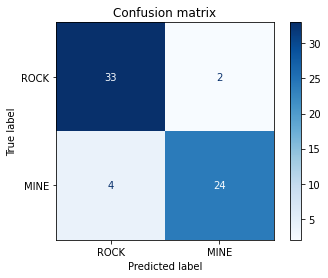

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, rescaledValidationX , Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

# **90% accuracy acheived by the RGB Model**